In [ ]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [82]:
test_features = pd.read_csv('dataset_Seminar2/Test_features.csv', header=None)
test_labels = pd.read_csv('dataset_Seminar2/Test_labels.csv', header=None).T
test_labels.columns = ['label']
test_skelletonpoints = pd.read_csv('dataset_Seminar2/Test_skelletonpoints.csv', header=None)

train_features = pd.read_csv('dataset_Seminar2/Train_features.csv', header=None)
train_labels = pd.read_csv('dataset_Seminar2/Train_labels.csv', header=None).T
train_labels.columns = ['label']
train_skelletonpoints = pd.read_csv('dataset_Seminar2/Train_skelletonpoints.csv', header=None)

In [88]:
# constants

label_dict = {
    1: 'wave',
    2: 'push',
    3: 'crouch',
    4: 'sitdown',
    5: 'bend'
}

skeleton = [
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 5),
    (2, 6),
    (6, 7),
    (7, 8),
    (2, 9),
    (9, 10),
    (10, 11),
    (2, 12),
    (12, 13),
    (13, 14),
    (1, 15),
    (1, 16),
    (15, 17),
    (16, 18),
    (3, 6),
    (9, 12)
]

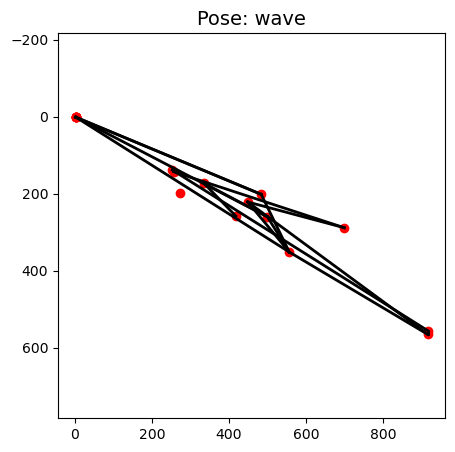

In [120]:
def plot_pose_with_label(sk_row, label, x_scale=2):
    """
    Dibuja la pose (esqueleto) a partir de una fila de SkeletonPoints y muestra la etiqueta de la clase.
    
    Parámetros:
    - sk_row: fila del dataframe SkeletonPoints (Series)
    - label: entero de 1 a 5, que representa la clase
    - x_scale: factor de escala para separar más las líneas horizontales (por defecto 2)
    """
    # Convertir la fila a un array de puntos
    points = np.array(sk_row).astype(float)
    
    # Extraer las coordenadas x (índices 0, 2, 4, ...) y y (índices 1, 3, 5, ...)
    xs = points[0::3]  # coordenadas X
    ys = points[1::3]  # coordenadas Y
    
    # Aplicar la escala en el eje X para separarlos más
    xs_scaled = xs * x_scale  # Separar más las coordenadas X
    
    # Crear la figura
    plt.figure(figsize=(5, 5))
    
    # Dibujar las conexiones del esqueleto
    for i, j in skeleton:
        if i < len(xs_scaled) and j < len(xs_scaled):  # Asegurarse de que ambos índices existen
            plt.plot([xs_scaled[i], xs_scaled[j]], [ys[i], ys[j]], 'k-', lw=2)
    
    # Dibujar los puntos de las coordenadas
    plt.scatter(xs_scaled, ys, color='red')
    
    # Mostrar el título con el nombre de la pose
    pose_name = label_dict.get(label, f"Unknown ({label})")
    plt.title(f"Pose: {pose_name}", fontsize=14)
    
    # Configuración de la visualización
    plt.axis('equal')  # Asegurarse de que los ejes tengan la misma escala
    plt.gca().invert_yaxis()  # Invertir el eje Y si es necesario
    
    # Mostrar el gráfico
    plt.show()


plot_pose_with_label(train_skelletonpoints.iloc[0], train_labels.iloc[0]['label'])  # Llama a la función para mostrar la pose

In [53]:
def plot_avg_csi_amplitude(csi_row):
    """
    Grafica la amplitud media del CSI por subcarrier (de una muestra).
    
    Parámetro:
    - csi_row: fila del dataframe train_features (pandas Series o array)
    """
    # Convertir a array y reshaping a (30 subcarriers, 3 TX, 3 RX)
    csi_matrix = np.array(csi_row).astype(float).reshape((30, 3, 3))

    # Calcular amplitud absoluta (por si hubiera complejos)
    amplitude = np.abs(csi_matrix)

    # Promediar en las 9 combinaciones TX-RX para cada subcarrier
    avg_per_subcarrier = amplitude.mean(axis=(1, 2))  # Resultado: shape (30,)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(range(1, 31), avg_per_subcarrier, marker='o')
    plt.title("Amplitud media del CSI por subcarrier")
    plt.xlabel("Subcarrier")
    plt.ylabel("Amplitud media")
    plt.grid(True)
    plt.xticks(range(1, 31))
    plt.show()

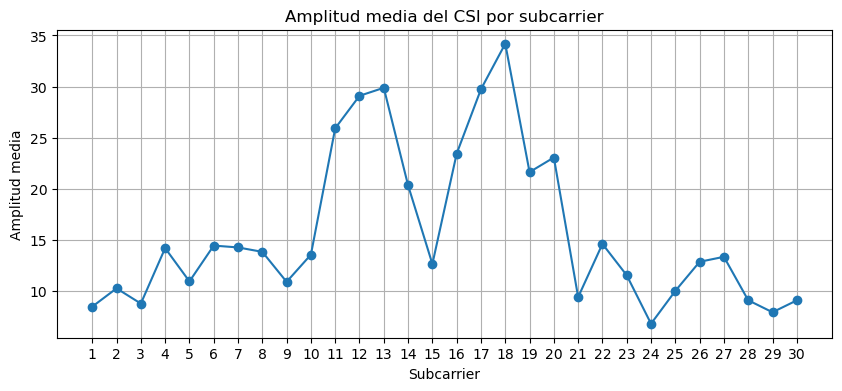

In [105]:
plot_avg_csi_amplitude(train_features.iloc[0])

In [54]:
def plot_csi_distribution_by_class(features_df, labels_df):
    """
    Grafica la media y desviación estándar de la amplitud del CSI por subcarrier para cada clase.
    
    - features_df: DataFrame de características (Train_features)
    - labels_df: DataFrame de etiquetas (Train_labels)
    """
    subcarrier_range = range(1, 31)
    plt.figure(figsize=(12, 6))

    for label_int, label_name in label_dict.items():
        # Filtrar filas por clase
        class_features = features_df[labels_df['label'] == label_int]

        # Matriz de amplitudes medias por subcarrier para cada muestra (N, 30)
        all_amplitudes = []
        for _, row in class_features.iterrows():
            csi = np.array(row).astype(float).reshape((30, 3, 3))
            amplitude = np.abs(csi).mean(axis=(1, 2))
            all_amplitudes.append(amplitude)
        
        all_amplitudes = np.array(all_amplitudes)

        # Media y desviación por subcarrier
        mean_amplitude = all_amplitudes.mean(axis=0)
        std_amplitude = all_amplitudes.std(axis=0)

        # Plot
        plt.plot(subcarrier_range, mean_amplitude, label=label_name)
        plt.fill_between(subcarrier_range,
                         mean_amplitude - std_amplitude,
                         mean_amplitude + std_amplitude,
                         alpha=0.2)

    plt.title("Distribución de la amplitud CSI por subcarrier para cada clase")
    plt.xlabel("Subcarrier")
    plt.ylabel("Amplitud media ± std")
    plt.legend()
    plt.grid(True)
    plt.xticks(subcarrier_range)
    plt.show()


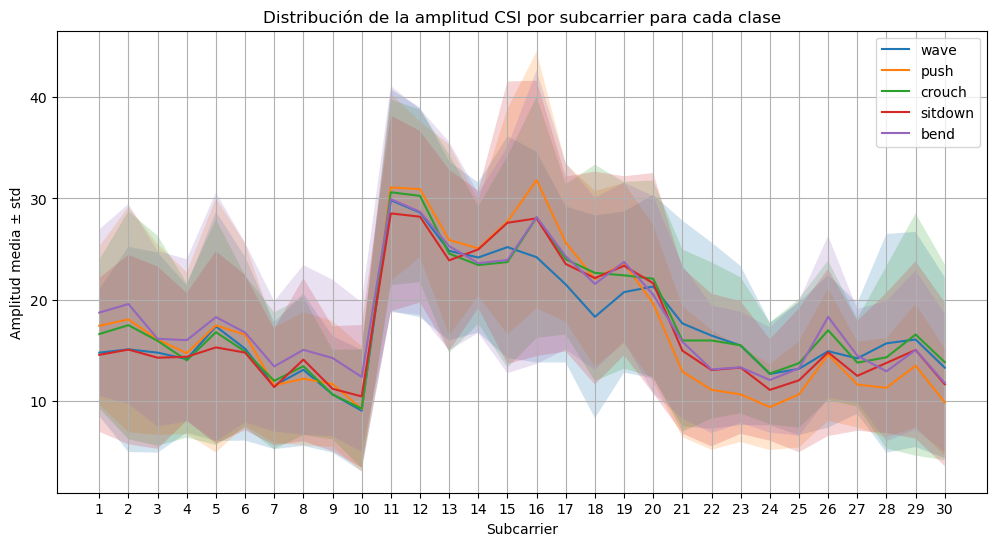

In [57]:
plot_csi_distribution_by_class(train_features, train_labels)